## Importing the needed libraries

In [1]:
import numpy as np
import pandas as pd

## Importing the *orders* data set

In [2]:
orders_path = 'orders_edited.csv'

Dob - date of birth;

PoR - customer place of residence;

EDT - expected delivery time;

ADT - actual delivery time; 

RoR - reason of return

In [3]:
df_orders = pd.read_csv(orders_path,
                        #parse_dates=['DoB', 'Order date'],
                        dtype=
                        {'Customer number': np.int64,
                         'Gender': object,
                         'PoR': object,
                         'Order number': np.int64,
                         'Product number': object,
                         'Sub category': object,
                         'Category': object,
                         'Count': np.int16,
                         'Price': np.float64,
                         'EDT': np.int16,
                         'ADT': np.int16,
                         'RoR': object,
                         'Rating': np.int8})

In [4]:
df_rated_orders = df_orders[df_orders['Rating'] != -1]
df_rated_orders.head(10)

,Customer number,DoB,Gender,PoR,Order number,Order date,Product number,Sub category,Category,Count,Price,EDT,ADT,RoR,Rating
7,1021820,10-01-1963,Man,Vlagtwedde,1590282,11-11-2016,5181402017768,Pruning shears,Pruning,1,103.16,1,1,NaN,4
8,1018918,07-01-1974,Woman,Coevorden,1202222,19-09-2014,3193523049599,Garden sets,Garden furniture,1,1079.03,3,-1,No reason given,4
13,1018918,07-01-1974,Woman,Coevorden,1202222,19-09-2014,3188775004229,Garden chairs,Garden furniture,1,340.07,3,3,NaN,4
14,1005006,08-01-1972,Man,Enschede,120659,09-03-2013,1102885267888,Insects and vermin,Control,4,62.84,1,1,NaN,4
15,1075732,11-01-1960,Man,Sittard-Geleen,1446799,26-01-2016,3132177221081,Insects and vermin,Control,2,41.90,1,1,NaN,4
19,1018918,07-01-1974,Woman,Coevorden,1202222,19-09-2014,4169424015147,Garden benches,Garden furniture,1,1189.15,1,3,NaN,4
30,1057516,12-01-1956,Man,Landsmeer,1476149,04-03-2016,5155582160880,Party tents,Sun protection,1,742.39,3,3,NaN,4
35,1018918,07-01-1974,Woman,Coevorden,1202222,19-09-2014,3131390056883,Pruning shears,Pruning,5,255.25,1,3,NaN,4
36,1046028,02-01-1993,Man,Sluis,1602242,29-11-2016,8177658172532,Garden statues,Garden decoration,1,389.90,4,4,NaN,4
41,1031000,18-01-1932,Man,'s-Gravenhage,1552241,31-08-2016,3137610130975,Garden statues,Garden decoration,1,358.70,1,1,NaN,4


In [11]:
df_rated_orders['Price per product'] = df_rated_orders['Price'] / df_rated_orders['Count']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
df_rated_orders.groupby('Rating')['Price per product'].mean()

Rating
1    439.838923
2    444.483583
3    442.749297
4    441.743337
5    441.536252
Name: Price per product, dtype: float64

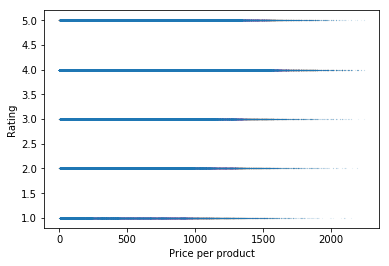

In [13]:
df_rated_orders.plot.scatter('Price per product', 'Rating', 0.001)